In [3]:
import pandas as pd 
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 'columns',inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
target = df.Survived
inputs = df.drop('Survived',axis = 'columns')

In [6]:
dummies = pd.get_dummies(inputs.Sex).astype(int)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [7]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [8]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [9]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [10]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [11]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.Age.head(6)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
Name: Age, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size = 0.2)

In [13]:
len(X_train)

712

In [14]:
len(X_test)

179

In [15]:
len(inputs)

891

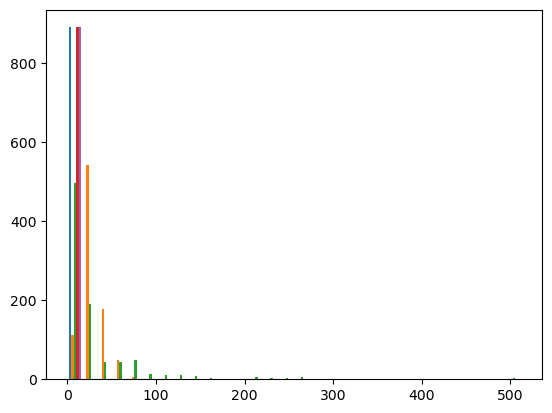

In [16]:
import matplotlib.pyplot as plt 
plt.hist(inputs,bins=30)
plt.show()

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [18]:
model.fit(X_train,y_train)

GaussianNB()

In [19]:
model.score(X_test,y_test)

0.7932960893854749

In [24]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0])

In [25]:
model.predict_proba(X_test)

array([[8.93701372e-02, 9.10629863e-01],
       [9.89484091e-01, 1.05159093e-02],
       [8.93701372e-02, 9.10629863e-01],
       [9.90153354e-01, 9.84664563e-03],
       [9.89642030e-01, 1.03579695e-02],
       [8.20297672e-03, 9.91797023e-01],
       [9.88981744e-01, 1.10182560e-02],
       [9.90156718e-01, 9.84328174e-03],
       [8.97533889e-01, 1.02466111e-01],
       [9.86210140e-01, 1.37898598e-02],
       [9.90199723e-01, 9.80027688e-03],
       [9.80789139e-01, 1.92108611e-02],
       [8.93701372e-02, 9.10629863e-01],
       [9.55652612e-01, 4.43473882e-02],
       [9.90936744e-01, 9.06325615e-03],
       [9.90183381e-01, 9.81661853e-03],
       [9.75260851e-01, 2.47391490e-02],
       [9.90157481e-01, 9.84251894e-03],
       [9.24943778e-01, 7.50562215e-02],
       [9.83444439e-01, 1.65555607e-02],
       [9.90240519e-01, 9.75948115e-03],
       [9.90141924e-01, 9.85807613e-03],
       [9.06794236e-02, 9.09320576e-01],
       [9.87757259e-01, 1.22427413e-02],
       [9.072746

In [26]:
print(y_test.shape)
print(y_pred.shape)

(179,)
(179,)


In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[94, 13],
       [24, 48]])

In [28]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7932960893854749

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       107
           1       0.79      0.67      0.72        72

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

